# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, gridspec, widgets
import logging, sys

log = logging.getLogger('plot_animation')
logging.basicConfig()

In [2]:
%matplotlib notebook

In [3]:

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
source1 = np.random.normal(-2.5, 1, 10000)
source2 = np.random.gamma(2, 1.5, 10000)
source3 = np.random.exponential(2, 10000)+7
source4 = np.random.uniform(14,20, 10000)

# plt.show()

<IPython.core.display.Javascript object>


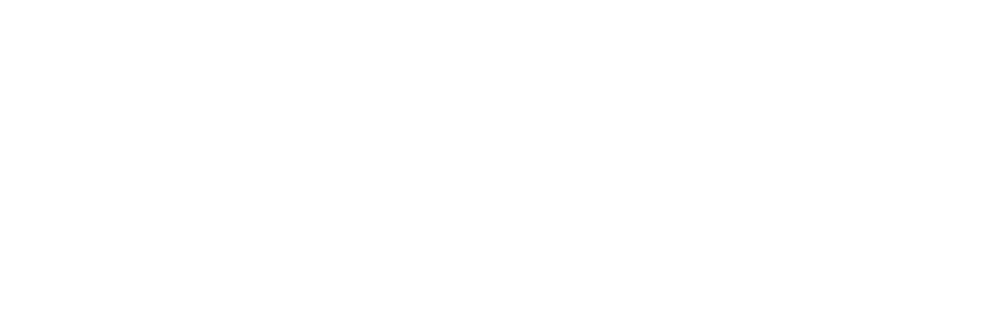

In [4]:

# create the function that will do the plotting, where curr is the current frame
# plt.cla()
def update(curr, total, perstep, x1, x2, x3, x4):
    # check if animation is at the last frame, and if so, stop the animation a
    plt.cla()
    end = curr * perstep
    plt.hist(x1[0:end], density=False, bins=np.arange(-5,0,0.2), alpha=0.5)
    plt.hist(x2[0:end], density=False, bins=np.arange(0,12,0.2), alpha=0.5)
    plt.hist(x3[0:end], density=False, bins=np.arange(7,17,0.2), alpha=0.5)
    plt.hist(x4[0:end], density=False, bins=np.arange(14,20,0.2), alpha=0.5);
    
    h = total/8
    plt.axis([-7,26,0,h])
#     plt.show()

#     plt.gca().set_title('Sampling the Normal Distribution')
#     plt.gca().set_ylabel('Frequency')
#     plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [22, h*3./4.])
    
def run_animation(steps, perstep):
    
    # plot the histograms
    total = steps*perstep
    fig = plt.figure(figsize=(9,3))
    
    log.debug('run with steps: %d', steps)
    x1, x2, x3, x4 = [np.sort(l[0:total]) for l in (source1, source2, source3, source4)]
    log.debug('x1: %s', x1)
    return (animation.FuncAnimation(fig, lambda c: update(c, total, perstep, x1, x2, x3, x4), steps, interval=50,
                                    repeat=False),
            x1, x2, x3, x4, fig)

# lambda c: update(c, steps)    
log.setLevel(logging.INFO)
a, x1, x2, x3, x4, fig = run_animation(100, 10)

# plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
# plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
# plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
# plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

# a = animation.FuncAnimation(fig, update, 100, interval=100, repeat=False)
# log.debug('log')
a

In [5]:
src1 = np.random.normal(5, 1, 10000)
src2 = np.random.gamma(2, 1, 10000)*0.8
src3 = np.random.exponential(1.2, 10000)
src4 = np.random.uniform(0,10, 10000)


<IPython.core.display.Javascript object>


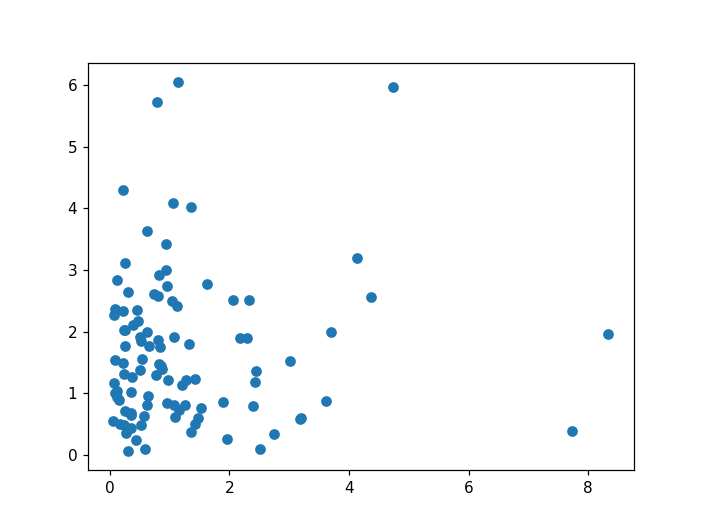

In [6]:
plt.figure()
plt.scatter(src3[0:100], src2[0:100])

<IPython.core.display.Javascript object>


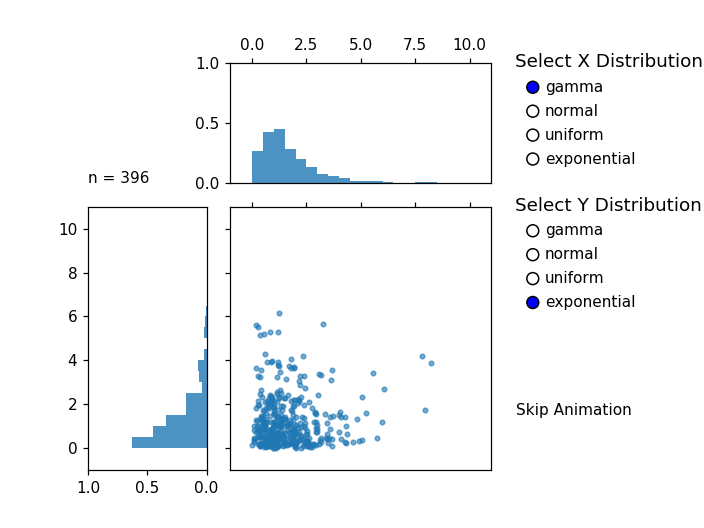

In [8]:
labeled_data = {
    'gamma': src2,
    'normal': src1,
    'uniform': src4,
    'exponential': src3
}

ani = None
selected = ['gamma', 'gamma']
howmany, step = 100, 4
fig = plt.figure()
gs = gridspec.GridSpec(3,4)

def add_radios(row, gs, ax):
    right = plt.subplot(gs[row, 3])
    right.set_frame_on(False)
    right.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
    right.set_title('Select {} Distribution'.format(ax),
                    loc='left', y=0.89)
    rb = widgets.RadioButtons(right, labeled_data.keys(), active=0)
    return right, rb

r1, rb1 = add_radios(0, gs, 'X')
r2, rb2 = add_radios(1, gs, 'Y')

cid1 = rb1.on_clicked(lambda l: rbclick(l, selected, 0, step, howmany, fig, gs))
cid2 = rb2.on_clicked(lambda l: rbclick(l, selected, 1, step, howmany, fig, gs))

br = plt.subplot(gs[2,3])
br.set_frame_on(False)
br.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
endbtn = widgets.Button(br, 'Skip Animation', color='#888888', hovercolor='#cccccc')

btncid = endbtn.on_clicked(lambda e: skip_to_end(selected, step, howmany, fig, gs))

class RootChart:
    def __init__(self, fig, mid, tl, top, left):
        self.fig = fig
        self.mid = mid
        self.tl = tl
        self.top = top
        self.left = left
    def clear(self):
        self.mid.cla()
        self.tl.cla()
        self.top.cla()
        self.left.cla()
    def reset(self):
        self.mid.axis([-1,11,-1,11])
        self.left.axis([1,0,-1,11])
        self.top.axis([-1,11,0,1])


# def reset_axes():
#     root.mid.axis([-1,11,-1,11])
#     root.left.axis([1,0,-1,11])
#     root.top.axis([-1,11,0,1])

def build_figure(fig, limit, selected, gs):
    
    left = plt.subplot(gs[1:3, 0])
    # left.xaxis.tick_top()
    left.invert_xaxis()
    # left.autoscale(enable=False, axis='both')

    top = plt.subplot(gs[0, 1:3])
    top.xaxis.tick_top()
    # top.yaxis.tick_right()
    # top.autoscale(enable=False, axis='both')

    mid = plt.subplot(gs[1:3, 1:3])
    mid.xaxis.tick_top()
    mid.tick_params(labelleft=False, labeltop=False)
    # Does nothing
    # mid.autoscale(enable=False, axis='both')

    tl = plt.subplot(gs[0,0])
    tl.set_frame_on(False)
    tl.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
    
    return RootChart(fig, mid, tl, top, left)
    
    
def rbclick(label, selected, which, step, limit, fig, gs):
    
    global ani, root
    if ani is not None:
        ani.event_source.stop()
#     root = build_figure(fig, limit, selected, gs)
#     root.clear()
    selected[which] = label
    ani = animation.FuncAnimation(fig, lambda c: render(c, step, limit, selected),
                                  limit, interval=100, repeat=False, blit=False)
    
def skip_to_end(selected, step, limit, fig, gs):
    
    global ani
    if ani is not None:
        ani.event_source.stop()
    ani = None
#     root = build_figure(fig, limit, selected, gs)
#     root.clear()
    render(limit, step, limit, selected)
    
def render(curr, step, limit, selected):
    
    global root
    root.clear()
    global labeled_data
    i, end = curr*step, limit*step
    x = labeled_data[selected[0]][0:i]
    y = labeled_data[selected[1]][end:end+i]
    root.mid.scatter(x, y, marker='.', alpha=0.6)
    root.top.hist(x, density=True, bins=np.arange(0,10.5,0.5), alpha=0.8)
    root.left.hist(y, density=True, bins=np.arange(0,10.5,0.5), alpha=0.8, orientation='horizontal')
    root.reset()
    root.tl.annotate('n = {}'.format(i), [0,0])

# Kick off with initial click event

root = build_figure(fig, howmany, selected, gs)
rbclick('gamma', selected, 0, step, howmany, fig, gs)
